In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv('monthly_dataset.csv')

df.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,480343.33,14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,480343.33,15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,480343.33,16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,470404.67,16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,470404.67,16293.1,9654.67,8730.29


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    object 
 2   Date                   252 non-null    object 
 3   Population (million)   252 non-null    float64
 4   Temperature (celsius)  252 non-null    float64
 5   CPI                    252 non-null    float64
 6   GDP (million bahts)    252 non-null    float64
 7   Peak Load (MW)         252 non-null    float64
 8   Generation (GWh)       252 non-null    float64
 9   Consumption (GWh)      252 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 19.8+ KB


In [4]:
df = df.drop(['Year', 'Month', 'Date', 'Generation (GWh)', 'Consumption (GWh)'], axis=1)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW)
0,62.88,26.75,69.90,501014.00,15992.30
1,65.12,26.91,98.30,799654.67,24493.26
2,63.09,26.63,81.70,614064.00,21062.70
3,66.09,27.54,97.13,767698.33,27198.40
4,66.06,27.51,97.72,796958.67,29403.70


In [5]:
X = df.drop('Peak Load (MW)', axis=1).values
y = df['Peak Load (MW)'].values

X.shape, y.shape

((252, 4), (252,))

In [6]:
train_len = 240

X_train = X[:train_len]
X_test = X[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 4), (12, 4), (240,), (12,))

In [9]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'hidden_layer_sizes': [(16, 8), (32, 16), (64, 32), (16, 16), (32, 32), (64, 64)],
#     'activation': ['tanh', 'relu'],
#     'alpha': [0.001, 0.01, 0.1]
# }

# mlp = MLPRegressor(max_iter=1000)
# grid_search = GridSearchCV(mlp, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print("Best hyperparameters: ", grid_search.best_params_)
# print("Validation score: {:.3f}".format(grid_search.best_score_))

Best hyperparameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 64)}
Validation score: -3.571


In [11]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# def create_ANN():
#     model = Sequential()
#     model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(1, activation='linear'))
#     model.compile(loss='mse', optimizer='adam')
#     return model

# model = KerasRegressor(build_fn=create_ANN, verbose=0)

# batch_size = [32, 48, 64]
# epochs = [1000, 3000, 5000]

# param_grid = dict(batch_size=batch_size, epochs=epochs)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
# grid_result = grid.fit(X_train, y_train)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -1257401.175000 using {'batch_size': 32, 'epochs': 5000}


In [12]:
import tensorflow as tf

hid_dim = 64
act_func = 'relu'
num_epochs = 5000
batch_size = 32

model = tf.keras.Sequential([
        tf.keras.layers.Dense(hid_dim, activation=act_func, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(hid_dim, activation=act_func),
        tf.keras.layers.Dense(1)])

model.compile(loss='mse', optimizer='adam')

history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5000
6/6 [==============================] - 1s 28ms/step - loss: 560932032.0000 - val_loss: 566180352.0000
Epoch 2/5000
6/6 [==============================] - 0s 10ms/step - loss: 560914432.0000 - val_loss: 566160896.0000
Epoch 3/5000
6/6 [==============================] - 0s 9ms/step - loss: 560895488.0000 - val_loss: 566139520.0000
Epoch 4/5000
6/6 [==============================] - 0s 9ms/step - loss: 560874176.0000 - val_loss: 566114496.0000
Epoch 5/5000
6/6 [==============================] - 0s 9ms/step - loss: 560848704.0000 - val_loss: 566083648.0000
Epoch 6/5000
6/6 [==============================] - 0s 9ms/step - loss: 560817344.0000 - val_loss: 566045376.0000
Epoch 7/5000
6/6 [==============================] - 0s 9ms/step - loss: 560778048.0000 - val_loss: 565998336.0000
Epoch 8/5000
6/6 [==============================] - 0s 9ms/step - loss: 560730560.0000 - val_loss: 565940416.0000
Epoch 9/5000
6/6 [==============================] - 0s 9ms/step - loss: 560670976.0000

In [13]:
# import tensorflow as tf

# tf.keras.models.save_model(model, 'ANN_tf_model')

INFO:tensorflow:Assets written to: ANN_tf_model\assets


INFO:tensorflow:Assets written to: ANN_tf_model\assets


In [14]:
import tensorflow as tf

model = tf.keras.models.load_model('ANN_tf_model')

In [15]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 84ms/step - loss: 455685.0938
Test loss: 455685.09375


1/1 [==============================] - 0s 88ms/step


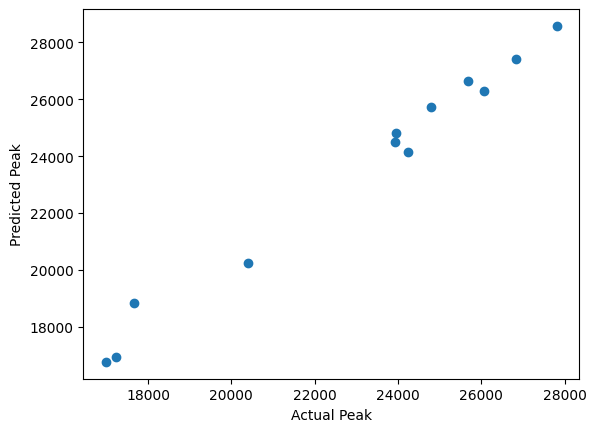

In [16]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Peak')
plt.ylabel('Predicted Peak')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import math

def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

MSE  = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, y_pred)
MAPE = mape(y_test, y_pred)

MSE, RMSE, MAE, MAPE

(455685.92578740005, 675.0451287042964, 574.5118684895837, 0.20085133456948764)

In [24]:
# import pickle

# pickle.dump(scaler, open('ANN_scaler.pkl', 'wb'))

In [25]:
import pickle

scaler = pickle.load(open('ANN_scaler.pkl', 'rb'))

In [28]:
X_sample = [67, 27, 109, 3000000]
X_sample = scaler.transform([X_sample])

y_hat = model.predict([X_sample])
print(y_hat)

1/1 [==============================] - 0s 25ms/step
[[30786.643]]
